In [35]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [36]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
# (x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [37]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

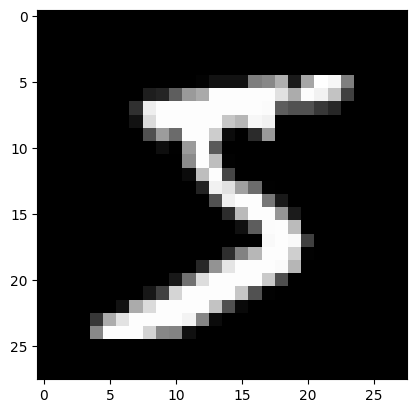

In [38]:
plt.imshow(x_train[0].reshape((28,28)),cmap = 'gray')

In [39]:
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,784).astype("float32")/255.0

print(x_train.shape)

(60000, 784)


In [40]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape = (784,))
x = layers.Dense(256,activation='relu',name = 'first_layer')(inputs)
x = layers.Dense(32,activation='relu',name = 'second_layer')(x)
outputs = layers.Dense(10,activation ='softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
model.fit(x_train,y_train,batch_size=64,epochs=5)
model.evaluate(x_test,y_test,batch_size = 64)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (Dense)                  │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,514 (818.41 KB)

 Trainable params: 209,514 (818.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8669 - loss: 0.4657
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.1038
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9798 - loss: 0.0681
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9849 - loss: 0.0477
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9889 - loss: 0.0355
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9710 - loss: 0.0921


[0.07994046062231064, 0.9753999710083008]

In [41]:
np.argmax(model.predict(np.array([x_train[0]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


5

In [42]:
ypred = np.argmax(model.predict(x_test),axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step


In [43]:
np.mean(ypred == y_test)

0.9754

In [44]:
ypred[0]

7

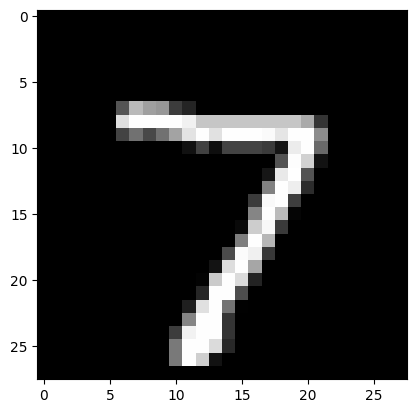

In [45]:
plt.imshow(x_test[0].reshape((28,28)),cmap = 'gray')